In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Preprocesamiento

In [2]:
data = pd.read_csv('/content/near-protocol_2020-05-11_2025-05-10.csv')

In [3]:
data.head()

,Start,End,Open,High,Low,Close,Volume,Market Cap
0,2025-05-09,2025-05-10,2.747336,2.976433,2.723532,2.895147,7.966233e+08,3.465271e+09
1,2025-05-08,2025-05-09,2.290229,2.739521,2.281262,2.724449,4.886795e+08,3.030394e+09
2,2025-05-07,2025-05-08,2.331400,2.383205,2.230589,2.285697,4.155200e+08,2.787348e+09
3,2025-05-06,2025-05-07,2.318966,2.349534,2.245305,2.331353,2.828670e+08,2.787216e+09
4,2025-05-05,2025-05-06,2.328401,2.397632,2.302583,2.320049,2.652861e+08,2.842840e+09


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1669 entries, 0 to 1668
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Start       1669 non-null   object 
 1   End         1669 non-null   object 
 2   Open        1669 non-null   float64
 3   High        1669 non-null   float64
 4   Low         1669 non-null   float64
 5   Close       1669 non-null   float64
 6   Volume      1669 non-null   float64
 7   Market Cap  1669 non-null   float64
dtypes: float64(6), object(2)
memory usage: 104.4+ KB


In [5]:
data['Date'] = pd.to_datetime(data['Start'])
data.insert(0, 'Date', data.pop('Date'))

data.drop(['Start', 'End'], axis=1, inplace=True)

data.head()

,Date,Open,High,Low,Close,Volume,Market Cap
0,2025-05-09,2.747336,2.976433,2.723532,2.895147,7.966233e+08,3.465271e+09
1,2025-05-08,2.290229,2.739521,2.281262,2.724449,4.886795e+08,3.030394e+09
2,2025-05-07,2.331400,2.383205,2.230589,2.285697,4.155200e+08,2.787348e+09
3,2025-05-06,2.318966,2.349534,2.245305,2.331353,2.828670e+08,2.787216e+09
4,2025-05-05,2.328401,2.397632,2.302583,2.320049,2.652861e+08,2.842840e+09


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1669 entries, 0 to 1668
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        1669 non-null   datetime64[ns]
 1   Open        1669 non-null   float64       
 2   High        1669 non-null   float64       
 3   Low         1669 non-null   float64       
 4   Close       1669 non-null   float64       
 5   Volume      1669 non-null   float64       
 6   Market Cap  1669 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 91.4 KB


In [7]:
data.isnull().sum()

,0
Date,0
Open,0
High,0
Low,0
Close,0
Volume,0
Market Cap,0


In [8]:
data.duplicated().sum()

np.int64(0)

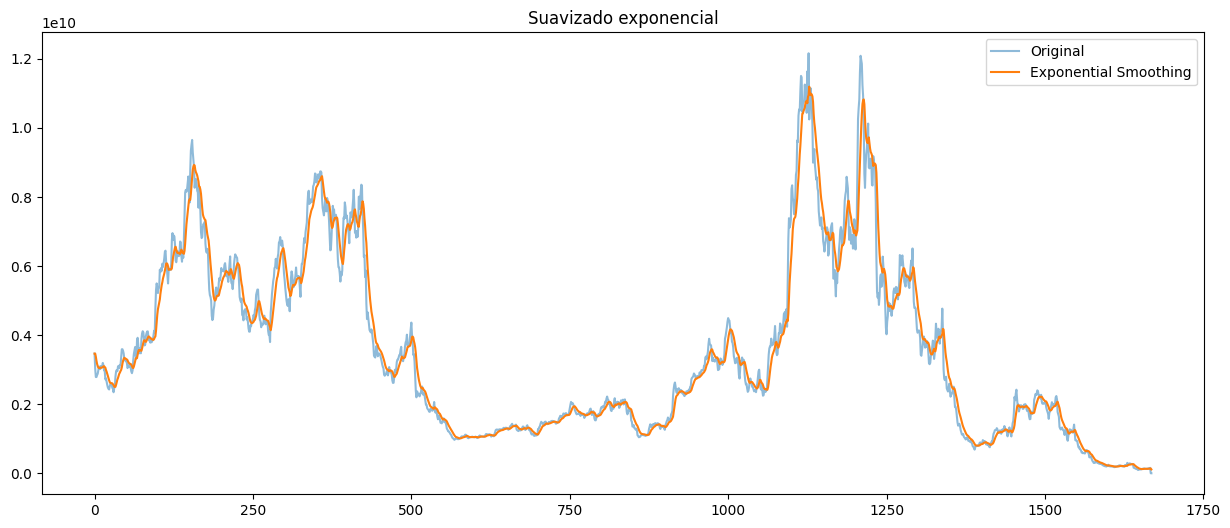

In [9]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

ses_model = SimpleExpSmoothing(data['Market Cap']).fit(smoothing_level=0.2, optimized=False)
data['Market Cap Smooth'] = ses_model.fittedvalues


plt.figure(figsize=(15, 6))
plt.plot(data['Market Cap'], label='Original', alpha=0.5)
plt.plot(data['Market Cap Smooth'], label='Exponential Smoothing')
plt.legend()
plt.title('Suavizado exponencial')
plt.show()

In [10]:
data

,Date,Open,High,Low,Close,Volume,Market Cap,Market Cap Smooth
0,2025-05-09,2.747336,2.976433,2.723532,2.895147,7.966233e+08,3.465271e+09,3.465271e+09
1,2025-05-08,2.290229,2.739521,2.281262,2.724449,4.886795e+08,3.030394e+09,3.465271e+09
2,2025-05-07,2.331400,2.383205,2.230589,2.285697,4.155200e+08,2.787348e+09,3.378296e+09
3,2025-05-06,2.318966,2.349534,2.245305,2.331353,2.828670e+08,2.787216e+09,3.260106e+09
4,2025-05-05,2.328401,2.397632,2.302583,2.320049,2.652861e+08,2.842840e+09,3.165528e+09
...,...,...,...,...,...,...,...,...
1664,2020-10-18,0.808574,0.871469,0.802287,0.871016,4.591787e+07,1.448164e+08,1.317836e+08
1665,2020-10-17,0.817904,0.857013,0.726276,0.808040,8.097295e+07,1.382133e+08,1.343902e+08
1666,2020-10-16,1.125216,1.148851,0.813440,0.817802,6.120328e+07,1.562425e+08,1.351548e+08
1667,2020-10-15,1.167162,1.240177,1.086936,1.124783,4.739661e+07,0.000000e+00,1.393723e+08


In [11]:
for col in ['Open', 'High', 'Low', 'Close', 'Volume', 'Market Cap', 'Market Cap Smooth']:
    data[f'Diff {col}'] = data[col].diff()
    data[f'Pct Diff {col}'] = data[col].pct_change()

data.to_csv('data.csv', index=False)

In [12]:
data

,Date,Open,High,Low,Close,Volume,Market Cap,Market Cap Smooth,Diff Open,Pct Diff Open,...,Diff Low,Pct Diff Low,Diff Close,Pct Diff Close,Diff Volume,Pct Diff Volume,Diff Market Cap,Pct Diff Market Cap,Diff Market Cap Smooth,Pct Diff Market Cap Smooth
0,2025-05-09,2.747336,2.976433,2.723532,2.895147,7.966233e+08,3.465271e+09,3.465271e+09,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2025-05-08,2.290229,2.739521,2.281262,2.724449,4.886795e+08,3.030394e+09,3.465271e+09,-0.457107,-0.166382,...,-0.442270,-0.162389,-0.170698,-0.058960,-3.079438e+08,-0.386561,-4.348768e+08,-0.125496,4.768372e-07,2.220446e-16
2,2025-05-07,2.331400,2.383205,2.230589,2.285697,4.155200e+08,2.787348e+09,3.378296e+09,0.041171,0.017977,...,-0.050673,-0.022213,-0.438752,-0.161042,-7.315948e+07,-0.149709,-2.430465e+08,-0.080203,-8.697537e+07,-2.509915e-02
3,2025-05-06,2.318966,2.349534,2.245305,2.331353,2.828670e+08,2.787216e+09,3.260106e+09,-0.012434,-0.005333,...,0.014716,0.006597,0.045656,0.019974,-1.326530e+08,-0.319246,-1.318527e+05,-0.000047,-1.181896e+08,-3.498497e-02
4,2025-05-05,2.328401,2.397632,2.302583,2.320049,2.652861e+08,2.842840e+09,3.165528e+09,0.009435,0.004069,...,0.057278,0.025510,-0.011304,-0.004849,-1.758085e+07,-0.062152,5.562451e+07,0.019957,-9.457804e+07,-2.901072e-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1664,2020-10-18,0.808574,0.871469,0.802287,0.871016,4.591787e+07,1.448164e+08,1.317836e+08,-0.061667,-0.070862,...,0.029274,0.037870,0.070931,0.088654,8.960239e+06,0.242446,1.374697e+06,0.009584,2.914513e+06,2.261607e-02
1665,2020-10-17,0.817904,0.857013,0.726276,0.808040,8.097295e+07,1.382133e+08,1.343902e+08,0.009330,0.011539,...,-0.076011,-0.094743,-0.062975,-0.072301,3.505508e+07,0.763430,-6.603139e+06,-0.045597,2.606550e+06,1.977901e-02
1666,2020-10-16,1.125216,1.148851,0.813440,0.817802,6.120328e+07,1.562425e+08,1.351548e+08,0.307313,0.375732,...,0.087164,0.120015,0.009762,0.012081,-1.976967e+07,-0.244152,1.802920e+07,0.130445,7.646121e+05,5.689493e-03
1667,2020-10-15,1.167162,1.240177,1.086936,1.124783,4.739661e+07,0.000000e+00,1.393723e+08,0.041946,0.037278,...,0.273496,0.336222,0.306980,0.375373,-1.380667e+07,-0.225587,-1.562425e+08,-1.000000,4.217530e+06,3.120518e-02


In [13]:
data.dropna(inplace=True)
data.reset_index(drop=True, inplace=True)

In [14]:
data.to_csv('data_preprocesed.csv', index=False)

# Experimentos

## Experimento 01
Regresión logistica (56 - 7)

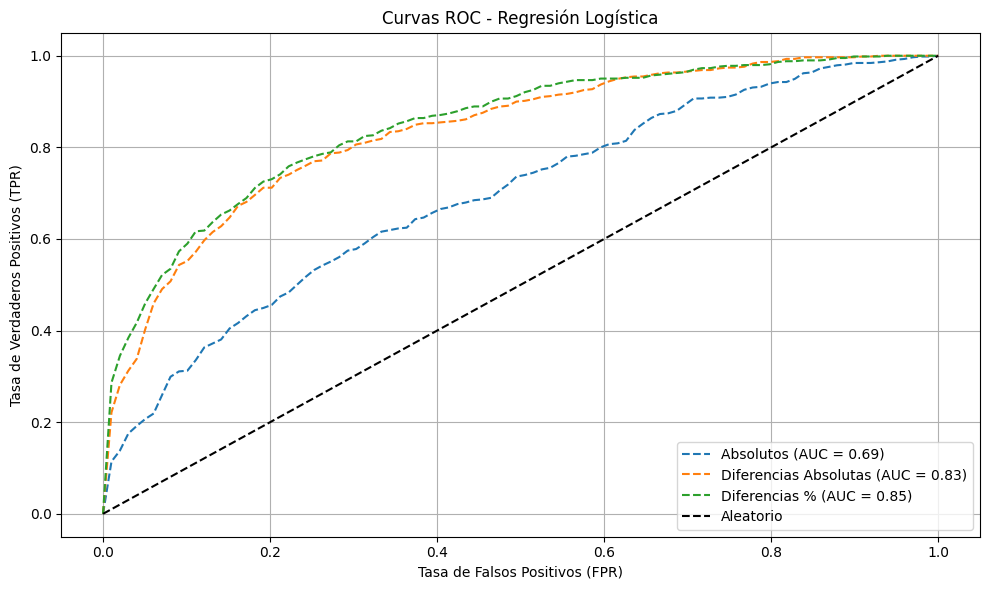

In [23]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import TimeSeriesSplit
import pandas as pd
import numpy as np

INPUT_WINDOW = 56
PREDICTION_HORIZON = 7
N_SPLITS = 5

data = pd.read_csv('/content/data_preprocesed.csv')
data.drop(['Market Cap', 'Diff Market Cap', 'Pct Diff Market Cap'], axis=1, inplace=True)
data.sort_values("Date", inplace=True)
data.reset_index(drop=True, inplace=True)

def create_features_and_labels(df, feature_columns, input_window, prediction_horizon):
    X, y = [], []
    for i in range(len(df) - input_window - prediction_horizon):
        window = df[feature_columns].iloc[i:i + input_window].values.flatten()
        last_high = df['High'].iloc[i + input_window - 1]
        future_high = df['High'].iloc[i + input_window + prediction_horizon - 1]
        label = int(future_high > last_high)
        X.append(window)
        y.append(label)
    return np.array(X), np.array(y)

def compute_mean_roc(model, X, y, n_splits=5):
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    tscv = TimeSeriesSplit(n_splits=n_splits)
    tprs, aucs = [], []
    mean_fpr = np.linspace(0, 1, 100)

    for train_idx, test_idx in tscv.split(X_scaled):
        X_train, X_test = X_scaled[train_idx], X_scaled[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]

        model.fit(X_train, y_train)
        y_proba = model.predict_proba(X_test)[:, 1]

        fpr, tpr, _ = roc_curve(y_test, y_proba)
        interp_tpr = np.interp(mean_fpr, fpr, tpr)
        interp_tpr[0] = 0.0
        tprs.append(interp_tpr)
        roc_auc = auc(fpr, tpr)
        aucs.append(roc_auc)

    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)

    return mean_fpr, mean_tpr, mean_auc


features_abs = ['Open', 'High', 'Low', 'Close', 'Volume', 'Market Cap Smooth']
features_diff = [col for col in data.columns if col.startswith('Diff ')]
features_pct = [col for col in data.columns if col.startswith('Pct Diff ')]

X_abs, y_abs = create_features_and_labels(data, features_abs, INPUT_WINDOW, PREDICTION_HORIZON)
X_diff, y_diff = create_features_and_labels(data, features_diff, INPUT_WINDOW, PREDICTION_HORIZON)
X_pct, y_pct = create_features_and_labels(data, features_pct, INPUT_WINDOW, PREDICTION_HORIZON)

model = LogisticRegression(penalty='l2', solver='liblinear')

fpr_abs, tpr_abs, auc_abs = compute_mean_roc(model, X_abs, y_abs)
fpr_diff, tpr_diff, auc_diff = compute_mean_roc(model, X_diff, y_diff)
fpr_pct, tpr_pct, auc_pct = compute_mean_roc(model, X_pct, y_pct)

plt.figure(figsize=(10, 6))
plt.plot(fpr_abs, tpr_abs, label=f'Absolutos (AUC = {auc_abs:.2f})', linestyle='--')
plt.plot(fpr_diff, tpr_diff, label=f'Diferencias Absolutas (AUC = {auc_diff:.2f})', linestyle='--')
plt.plot(fpr_pct, tpr_pct, label=f'Diferencias % (AUC = {auc_pct:.2f})', linestyle='--')
plt.plot([0, 1], [0, 1], 'k--', label='Aleatorio')
plt.title('Curvas ROC - Regresión Logística')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

## Experimento 02
Random forest (56 - 7)

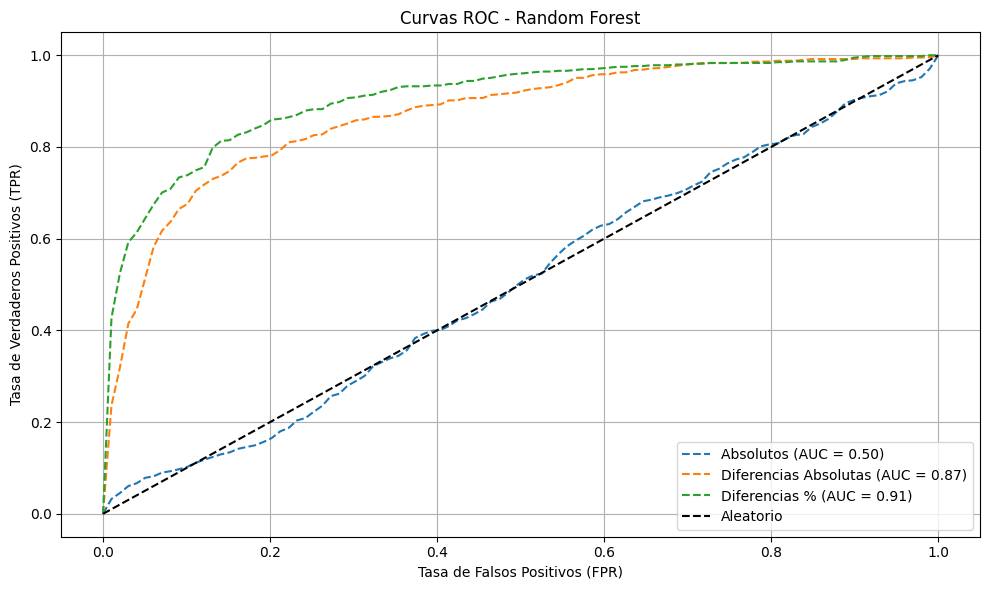

In [24]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import roc_curve, auc
import pandas as pd
import numpy as np

INPUT_WINDOW = 56
PREDICTION_HORIZON = 7
N_SPLITS = 5

data = pd.read_csv('/content/data_preprocesed.csv')
data.drop(['Market Cap', 'Diff Market Cap', 'Pct Diff Market Cap'], axis=1, inplace=True)
data.sort_values("Date", inplace=True)
data.reset_index(drop=True, inplace=True)

def create_features_and_labels(df, feature_columns, input_window, prediction_horizon):
    X, y = [], []
    for i in range(len(df) - input_window - prediction_horizon):
        window = df[feature_columns].iloc[i:i + input_window].values.flatten()
        last_high = df['High'].iloc[i + input_window - 1]
        future_high = df['High'].iloc[i + input_window + prediction_horizon - 1]
        label = int(future_high > last_high)
        X.append(window)
        y.append(label)
    return np.array(X), np.array(y)

def compute_mean_roc(model, X, y, n_splits=5):
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    tscv = TimeSeriesSplit(n_splits=n_splits)
    tprs, aucs = [], []
    mean_fpr = np.linspace(0, 1, 100)

    for train_idx, test_idx in tscv.split(X_scaled):
        X_train, X_test = X_scaled[train_idx], X_scaled[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]

        model.fit(X_train, y_train)
        y_proba = model.predict_proba(X_test)[:, 1]

        fpr, tpr, _ = roc_curve(y_test, y_proba)
        interp_tpr = np.interp(mean_fpr, fpr, tpr)
        interp_tpr[0] = 0.0
        tprs.append(interp_tpr)
        roc_auc = auc(fpr, tpr)
        aucs.append(roc_auc)

    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)

    return mean_fpr, mean_tpr, mean_auc

features_abs = ['Open', 'High', 'Low', 'Close', 'Volume', 'Market Cap Smooth']
features_diff = [col for col in data.columns if col.startswith('Diff ')]
features_pct = [col for col in data.columns if col.startswith('Pct Diff ')]

X_abs, y_abs = create_features_and_labels(data, features_abs, INPUT_WINDOW, PREDICTION_HORIZON)
X_diff, y_diff = create_features_and_labels(data, features_diff, INPUT_WINDOW, PREDICTION_HORIZON)
X_pct, y_pct = create_features_and_labels(data, features_pct, INPUT_WINDOW, PREDICTION_HORIZON)

rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    random_state=42,
    class_weight='balanced_subsample'
)

fpr_abs, tpr_abs, auc_abs = compute_mean_roc(rf_model, X_abs, y_abs)
fpr_diff, tpr_diff, auc_diff = compute_mean_roc(rf_model, X_diff, y_diff)
fpr_pct, tpr_pct, auc_pct = compute_mean_roc(rf_model, X_pct, y_pct)

plt.figure(figsize=(10, 6))
plt.plot(fpr_abs, tpr_abs, label=f'Absolutos (AUC = {auc_abs:.2f})', linestyle='--')
plt.plot(fpr_diff, tpr_diff, label=f'Diferencias Absolutas (AUC = {auc_diff:.2f})', linestyle='--')
plt.plot(fpr_pct, tpr_pct, label=f'Diferencias % (AUC = {auc_pct:.2f})', linestyle='--')
plt.plot([0, 1], [0, 1], 'k--', label='Aleatorio')
plt.title('Curvas ROC - Random Forest')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()